# Part I: Manipulating, Pre-Processing & Export Dataset to .h5

## Imports

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import mahotas
import cv2
import os
import h5py

## Constant

In [20]:
images_per_class       = 800
fixed_size             = tuple((200, 200))
train_path             = "dataset/train"
test_path  = "dataset/test"

h5_train_data          = 'output/train_data.h5' # paths to write .h5
h5_train_labels        = 'output/train_labels.h5'
# you should create /output folder first or it will cause an error while trying to write .h5 files

bins                   = 8

## Functions

In [10]:
def rgb_bgr(image):
    rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return rgb_img

In [11]:
def bgr_hsv(rgb_img):
    hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
    return hsv_img

In [12]:
def img_segmentation(rgb_img,hsv_img):
    lower_green = np.array([25,0,20])
    upper_green = np.array([100,255,255])
    healthy_mask = cv2.inRange(hsv_img, lower_green, upper_green)
    result = cv2.bitwise_and(rgb_img,rgb_img, mask=healthy_mask)
    lower_brown = np.array([10,0,10])
    upper_brown = np.array([30,255,255])
    disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
    disease_result = cv2.bitwise_and(rgb_img, rgb_img, mask=disease_mask)
    final_mask = healthy_mask + disease_mask
    final_result = cv2.bitwise_and(rgb_img, rgb_img, mask=final_mask)
    return final_result

In [13]:
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [14]:
def fd_haralick(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    return haralick

In [15]:
def fd_histogram(image, mask=None):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [14]:
# get the training labels
train_labels = os.listdir(train_path)
LABLES = os.listdir('./dataset/train/') # get name of each folder in this dir
# sort the training labels
train_labels.sort()
print(train_labels)

['Apple_Black_rot', 'Apple_Cedar_apple_rust', 'Apple_healthy', 'Apple_scab', 'Blueberry_healthy', 'Cherry_(including_sour)_Powdery_mildew', 'Cherry_(including_sour)_healthy', 'Corn_(maize)_Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)_Common_rust', 'Corn_(maize)_Northern_Leaf_Blight', 'Corn_(maize)_healthy', 'Grape_Black_rot', 'Grape_Esca_(Black_Measles)', 'Grape_Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape_healthy', 'Orange_Haunglongbing_(Citrus_greening)', 'Peach_Bacterial_spot', 'Peach_healthy', 'Pepper_bell_Bacterial_spot', 'Pepper_bell_healthy', 'Potato_Early_blight', 'Potato_Late_blight', 'Potato_healthy', 'Raspberry_healthy', 'Soybean_healthy', 'Squash_Powdery_mildew', 'Strawberry_Leaf_scorch', 'Strawberry_healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites Two-spotted_spider_mite', 'Tomato_Target_Spot', 'Tomato_Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_Tomato_mosaic_virus', 'Tom

In [18]:
def create_dataset(path_str):
    counter = 0
    #imgs_with_labels = []
    
    y = []
    global_feature = []
    x = []
    for label in LABLES:
        class_num = LABLES.index(label) # using index number of label, rather then use the name of a label
        path = os.path.join(path_str,label)
        for img in os.listdir(path): 
            counter += 1            
            image = cv2.imread(os.path.join(path,img)) # ,cv2.IMREAD_GRAYSCALE
            image = cv2.resize(image, fixed_size)
            
            RGB_BGR       = rgb_bgr(image)
            BGR_HSV       = bgr_hsv(RGB_BGR)
            IMG_SEGMENT   = img_segmentation(RGB_BGR,BGR_HSV)
            
            fv_hu_moments = fd_hu_moments(IMG_SEGMENT)
            fv_haralick   = fd_haralick(IMG_SEGMENT)
            fv_histogram  = fd_histogram(IMG_SEGMENT)
            
            global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
            
            y.append(label)
            x.append(global_feature)
            
        print(f'Label: {path}, Counter: {counter}')
        counter = 0
    return x, y

In [19]:
global_features, labels = create_dataset(train_path)

Label: dataset/train\Apple_Black_rot, Counter: 3974
Label: dataset/train\Apple_Cedar_apple_rust, Counter: 3520
Label: dataset/train\Apple_healthy, Counter: 4016
Label: dataset/train\Apple_scab, Counter: 4032
Label: dataset/train\Blueberry_healthy, Counter: 3632
Label: dataset/train\Cherry_(including_sour)_healthy, Counter: 3652
Label: dataset/train\Cherry_(including_sour)_Powdery_mildew, Counter: 3366
Label: dataset/train\Corn_(maize)_Cercospora_leaf_spot Gray_leaf_spot, Counter: 3284
Label: dataset/train\Corn_(maize)_Common_rust, Counter: 3814
Label: dataset/train\Corn_(maize)_healthy, Counter: 3718
Label: dataset/train\Corn_(maize)_Northern_Leaf_Blight, Counter: 3816
Label: dataset/train\Grape_Black_rot, Counter: 3776
Label: dataset/train\Grape_Esca_(Black_Measles), Counter: 3840
Label: dataset/train\Grape_healthy, Counter: 3384
Label: dataset/train\Grape_Leaf_blight_(Isariopsis_Leaf_Spot), Counter: 3444
Label: dataset/train\Orange_Haunglongbing_(Citrus_greening), Counter: 4020
Label

In [20]:
print("[STATUS] feature vector size {}".format(np.array(global_features).shape))

[STATUS] feature vector size (140590, 532)


In [21]:
print("[STATUS] training Labels {}".format(np.array(labels).shape))

[STATUS] training Labels (140590,)


In [22]:
targetNames = np.unique(labels)
le          = LabelEncoder()
target      = le.fit_transform(labels)
print("[STATUS] training labels encoded...")

[STATUS] training labels encoded...


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler            = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print("[STATUS] feature vector normalized...")

[STATUS] feature vector normalized...


In [24]:
print("[STATUS] target labels: {}".format(target))
print("[STATUS] target labels shape: {}".format(target.shape))

[STATUS] target labels: [ 0  0  0 ... 35 35 35]
[STATUS] target labels shape: (140590,)


## Writing to .h5

In [26]:
h5f_data = h5py.File(h5_train_data, 'w') # you should create /output folder first or it will cause an error
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

<HDF5 dataset "dataset_1": shape (140590, 532), type "<f8">

In [27]:
h5f_label = h5py.File(h5_train_labels, 'w') # you should create /output folder first or it will cause an error
h5f_label.create_dataset('dataset_1', data=np.array(target))

<HDF5 dataset "dataset_1": shape (140590,), type "<i8">

In [28]:
h5f_data.close()
h5f_label.close()

# Part II: Train your Dataset

## Imporst

In [1]:
import glob
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
num_trees = 100
test_size = 0.20
seed      = 9
h5_train_data    = 'output/train_data.h5'
h5_train_labels  = 'output/train_labels.h5'
scoring    = "accuracy"

In [6]:
# get the training labels
train_labels = os.listdir(train_path)

# sort the training labels
train_labels.sort()

#if not os.path.exists(test_path):
#    os.makedirs(test_path)

## Comparing Between ML Algs

In [37]:
models = []
#models.append(('LR', LogisticRegression(random_state=seed))) caused me an error
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(random_state=seed))) idk why but it take too long, it didn't finish, and it was hard too stop the process

In [7]:
results = []
names   = []

# import the feature vector and trained labels
h5f_data  = h5py.File(h5_train_data, 'r')
h5f_label = h5py.File(h5_train_labels, 'r')

global_features_string = h5f_data['dataset_1']
global_labels_string   = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels   = np.array(global_labels_string)

h5f_data.close()
h5f_label.close()

In [8]:
print("[STATUS] features shape: {}".format(global_features.shape))
print("[STATUS] labels shape: {}".format(global_labels.shape))

print("[STATUS] training started...")

[STATUS] features shape: (140590, 532)
[STATUS] labels shape: (140590,)
[STATUS] training started...


In [9]:
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))

[STATUS] splitted train and test data...
Train data  : (112472, 532)
Test data   : (28118, 532)


In [ ]:
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

LDA: 0.627063 (0.005082)
KNN: 0.899077 (0.001827)
CART: 0.959439 (0.001977)
RF: 0.992309 (0.001114)
NB: 0.485490 (0.004787)


## Fiting The Model

In [10]:
clf  = RandomForestClassifier(n_estimators=num_trees)

In [11]:
clf.fit(trainDataGlobal, trainLabelsGlobal)

RandomForestClassifier()

## Prediction

In [12]:
y_predict=clf.predict(testDataGlobal)

In [13]:
y_predict

array([ 3, 24,  2, ..., 11,  8, 11], dtype=int64)

### Confusion Matrix

In [14]:
cm = confusion_matrix(testLabelsGlobal,y_predict)

<AxesSubplot:>

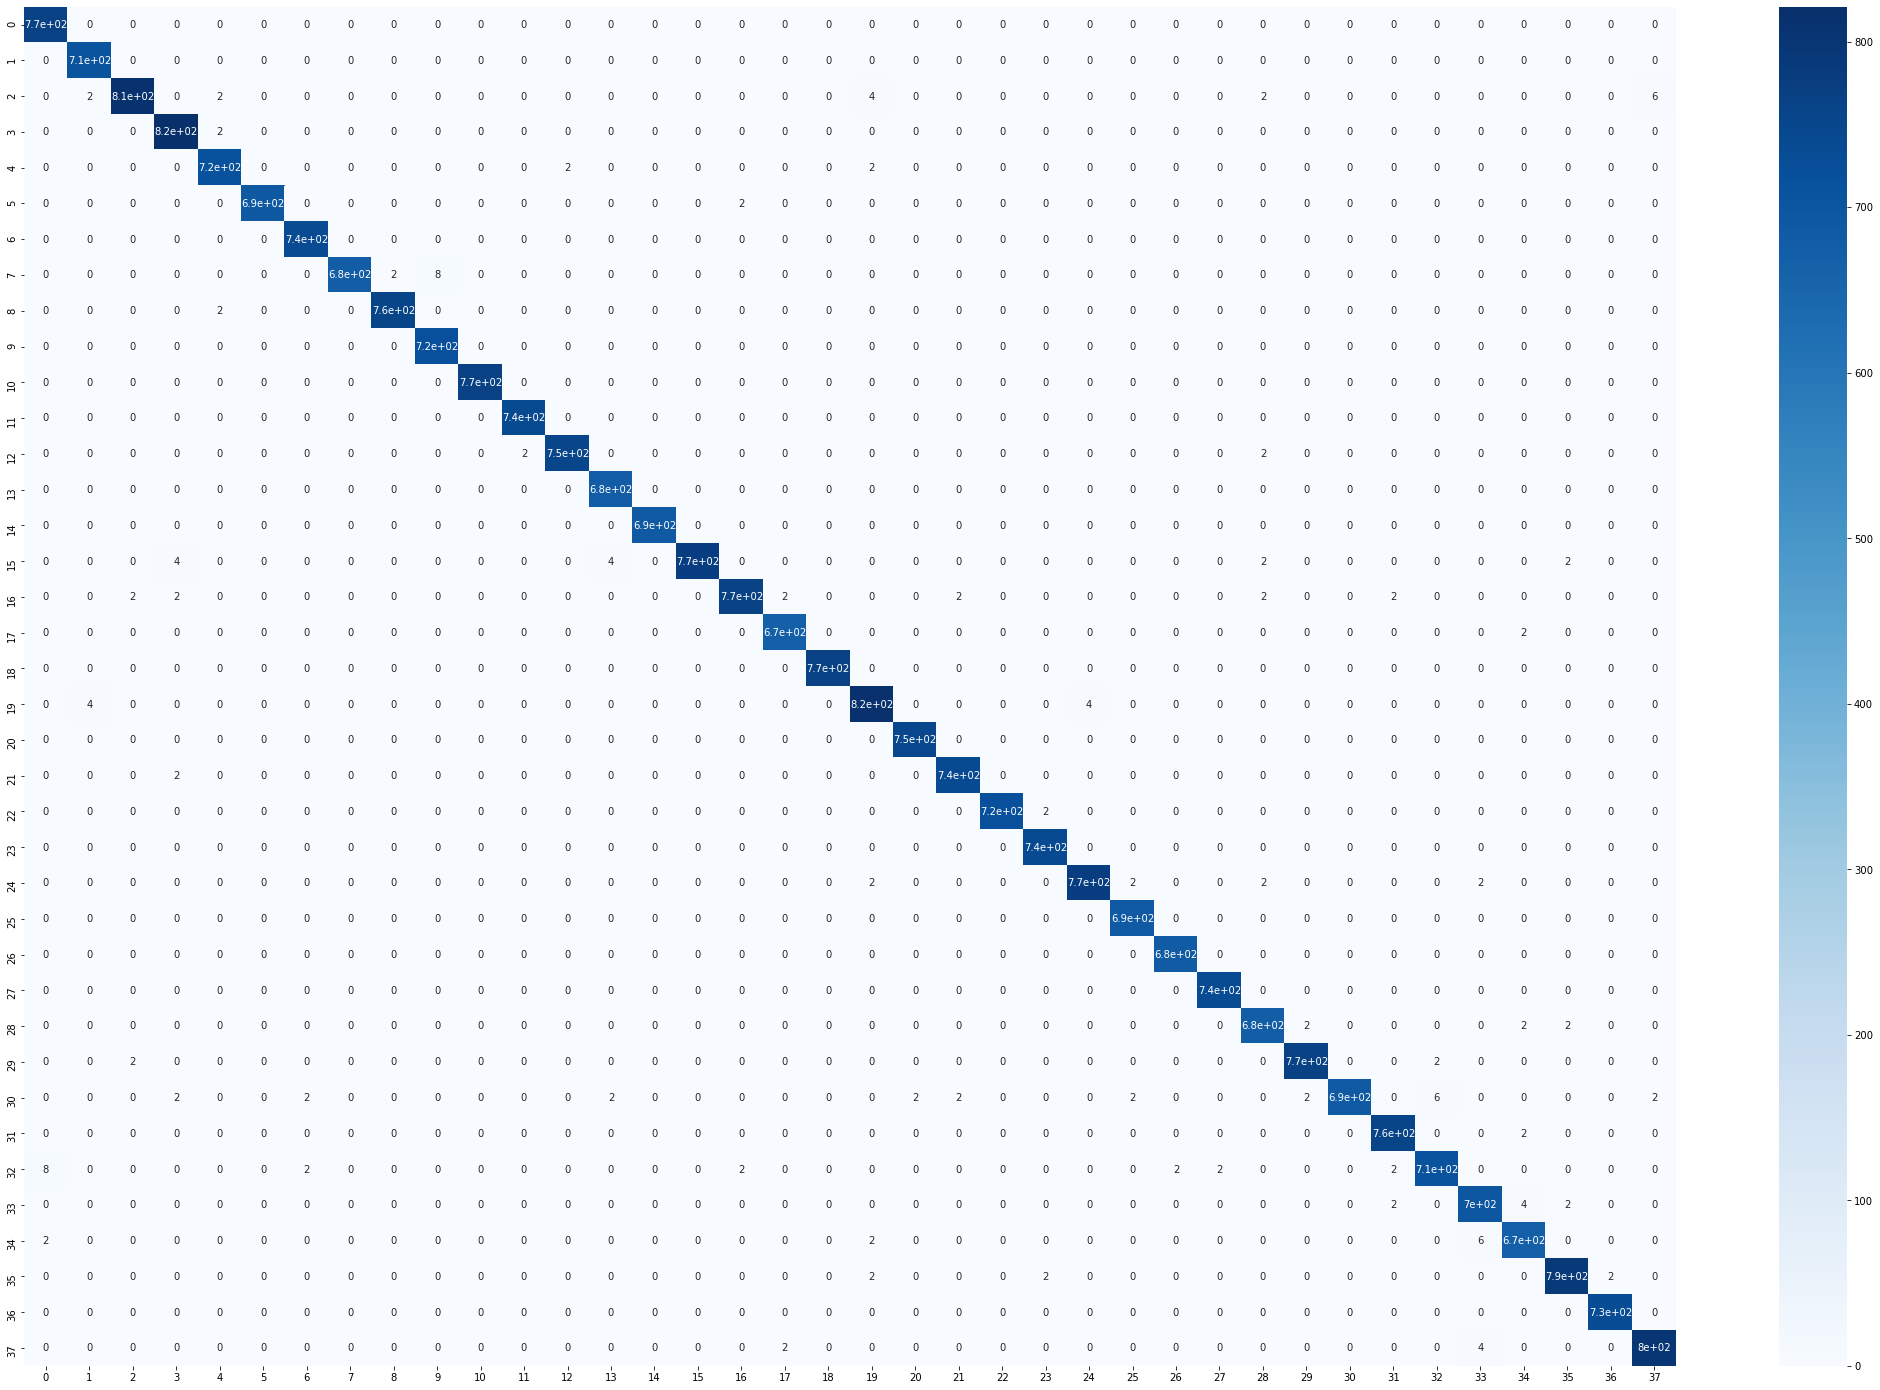

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(37,25))
sns.heatmap(cm ,annot=True, cmap="Blues")

In [16]:
print(classification_report(testLabelsGlobal,y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       767
           1       0.99      1.00      1.00       708
           2       1.00      0.98      0.99       829
           3       0.99      1.00      0.99       823
           4       0.99      0.99      0.99       722
           5       1.00      1.00      1.00       692
           6       0.99      1.00      1.00       735
           7       1.00      0.99      0.99       688
           8       1.00      1.00      1.00       760
           9       0.99      1.00      0.99       721
          10       1.00      1.00      1.00       766
          11       1.00      1.00      1.00       740
          12       1.00      0.99      1.00       758
          13       0.99      1.00      1.00       680
          14       1.00      1.00      1.00       689
          15       1.00      0.98      0.99       785
          16       0.99      0.98      0.99       778
          17       0.99    

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(testLabelsGlobal, y_predict)

0.994025179600256

### Saving Model

In [37]:
import joblib

In [42]:
joblib.dump(clf, "./Plants_DR_RF.joblib")

['./Plants_DR_RF.joblib']

### Loading Model

In [38]:
loaded_clf = joblib.load("./Plants_DR_RF.joblib")

In [81]:
IMG_PATH = './test.jpg'

In [82]:
import cv2

In [83]:
x = []
image = cv2.imread(IMG_PATH) # ,cv2.IMREAD_GRAYSCALE
image = cv2.resize(image, fixed_size)
            
RGB_BGR       = rgb_bgr(image)
BGR_HSV       = bgr_hsv(RGB_BGR)
IMG_SEGMENT   = img_segmentation(RGB_BGR,BGR_HSV)
            
fv_hu_moments = fd_hu_moments(IMG_SEGMENT)
fv_haralick   = fd_haralick(IMG_SEGMENT)
fv_histogram  = fd_histogram(IMG_SEGMENT)
            
global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
            
x.append(global_feature)

In [84]:
loaded_clf.predict(x)

array([13], dtype=int64)

In [85]:
def segmnt_extrac(imag):
    imgtest=[]
    x=[]
    imag= cv2.resize(imag, fixed_size)

    RGB_BGR= rgb_bgr(imag)
    BGR_HSV= bgr_hsv(RGB_BGR)
    IMG_SEGMENT   = img_segmentation(RGB_BGR,BGR_HSV)
  
    fv_hu_moments = fd_hu_moments(IMG_SEGMENT )
    fv_haralick   = fd_haralick(IMG_SEGMENT )
    fv_histogram  = fd_histogram(IMG_SEGMENT )
  
    imgtest= np.hstack([fv_histogram,fv_haralick, fv_hu_moments])
    
    x.append(imgtest)

    return x

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler            = MinMaxScaler(feature_range=(0, 1))

In [87]:
image=cv2.imread(IMG_PATH)
imgtest=segmnt_extrac(image)
imgscal =scaler.fit_transform(imgtest)
y_pred=loaded_clf.predict(imgtest)

In [88]:
y_pred

array([13], dtype=int64)